<a href="https://colab.research.google.com/github/Rokibul-Islam-Robi/Machine-Learning-Data-Driven-I-DS424-/blob/main/0242220005341216_39_A2_Lab_Assessment_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rokibul Islam - 0242220005341167 - 39 A2 - Lab Assessment - SAM - (Lab Performance-1)**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
# spliting training and test data
 (x_train, y_train), (x_test , y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# normalize pixel values
x_train = x_train / 255.0
x_test = x_test /255.0

In [ ]:
# performin one hot encoding for categorical columns
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# defying neural network model using keras
model = keras.models.Sequential([
    layers.Input(shape = (28,28), name = "Input_Layer"),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(60, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# training model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7319 - loss: 0.7545 - val_accuracy: 0.8397 - val_loss: 0.4389
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8516 - loss: 0.4080 - val_accuracy: 0.8618 - val_loss: 0.3826
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8643 - loss: 0.3711 - val_accuracy: 0.8643 - val_loss: 0.3766
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8722 - loss: 0.3440 - val_accuracy: 0.8723 - val_loss: 0.3478
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8801 - loss: 0.3263 - val_accuracy: 0.8789 - val_loss: 0.3342


In [ ]:
# calculating loss and accuracy
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc:.3f} \n Test Loss: {loss: .3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3558
Test accuracy: 0.869 
 Test Loss:  0.361


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#classification report
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.79      0.74      0.76      1000
           3       0.87      0.88      0.88      1000
           4       0.75      0.82      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.66      0.70      0.68      1000
           7       0.96      0.91      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



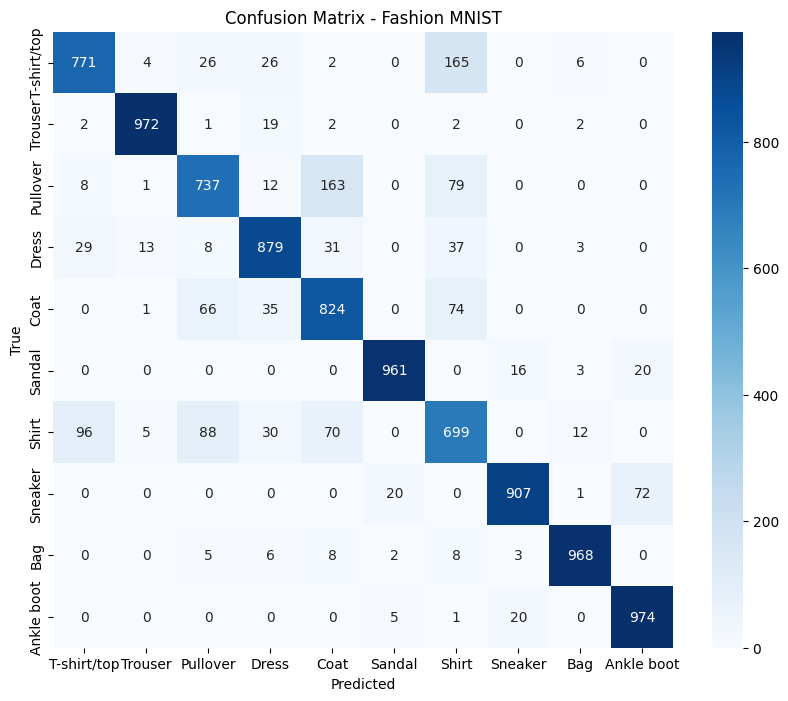

In [ ]:
# visualizing confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fashion MNIST')
plt.show()

Save and Load model in Drive for future use

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/My Drive/fashion_mnist_model.keras'
model.save(save_path)

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model(save_path)